In [20]:
import pandas as pd
from newspaper import Article
import nltk
import ast
import requests
from tqdm.auto import tqdm
tqdm.pandas()
from bs4 import BeautifulSoup, Comment

In [21]:
headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0'
    }

In [22]:
initial_tweet_path = 'thehimalayan/tweets.csv'
file_path = "thehimalayan.csv"
result_file_path = "thehimalayan_articles.csv"

In [23]:
df = pd.read_csv(initial_tweet_path, usecols=['id', 'created_at', 'urls'], parse_dates=['created_at'])

In [24]:
list(df)

['id', 'created_at', 'urls']

In [25]:
df.shape

(39023, 3)

In [26]:
df.head()

,id,created_at,urls
0,1386731977542455296,2021-04-26 23:05:42+05:45,['https://bit.ly/3gBXQpn']
1,1386727294434254857,2021-04-26 22:47:05+05:45,['https://bit.ly/2RWCAjG']
2,1386722788099170307,2021-04-26 22:29:11+05:45,['https://bit.ly/2PpCtwj']
3,1386713496511975428,2021-04-26 21:52:16+05:45,['https://bit.ly/3evKsAu']
4,1386709296264658950,2021-04-26 21:35:34+05:45,['https://bit.ly/2R0XC0g']


In [27]:
df.tail()

,id,created_at,urls
39018,947678773498933249,2018-01-01 09:45:01+05:45,['https://wp.me/p6iC0n-1YTA']
39019,947677332487020544,2018-01-01 09:39:17+05:45,['https://wp.me/p6iC0n-1YUL']
39020,947674994766516224,2018-01-01 09:30:00+05:45,['https://wp.me/p6iC0n-1YU4']
39021,947668683454799878,2018-01-01 09:04:55+05:45,['https://wp.me/p6iC0n-1YU3']
39022,947656457888993281,2018-01-01 08:16:20+05:45,['https://wp.me/p6iC0n-1YTU']


In [28]:
df.resample('Y', on='created_at')[['id']].count()

,id
created_at,
2018-12-31 00:00:00+05:45,14060
2019-12-31 00:00:00+05:45,8984
2020-12-31 00:00:00+05:45,12492
2021-12-31 00:00:00+05:45,3487


<AxesSubplot:xlabel='created_at'>

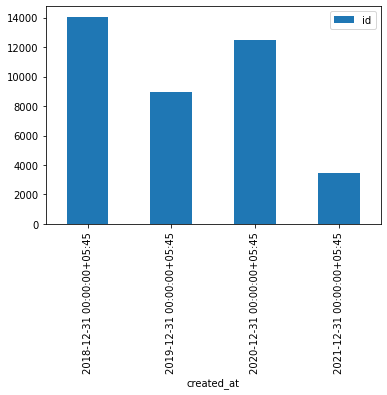

In [29]:
df.resample('Y', on='created_at')[['id']].count().plot(kind='bar')

### Remove tweets without a URL

In [30]:
df=df[df.urls!="[]"]

In [31]:
df = df.drop_duplicates(['urls'], keep="last")

In [32]:
df

,id,created_at,urls
0,1386731977542455296,2021-04-26 23:05:42+05:45,['https://bit.ly/3gBXQpn']
1,1386727294434254857,2021-04-26 22:47:05+05:45,['https://bit.ly/2RWCAjG']
2,1386722788099170307,2021-04-26 22:29:11+05:45,['https://bit.ly/2PpCtwj']
3,1386713496511975428,2021-04-26 21:52:16+05:45,['https://bit.ly/3evKsAu']
4,1386709296264658950,2021-04-26 21:35:34+05:45,['https://bit.ly/2R0XC0g']
...,...,...,...
39018,947678773498933249,2018-01-01 09:45:01+05:45,['https://wp.me/p6iC0n-1YTA']
39019,947677332487020544,2018-01-01 09:39:17+05:45,['https://wp.me/p6iC0n-1YUL']
39020,947674994766516224,2018-01-01 09:30:00+05:45,['https://wp.me/p6iC0n-1YU4']
39021,947668683454799878,2018-01-01 09:04:55+05:45,['https://wp.me/p6iC0n-1YU3']


In [33]:
df['article'] = None

In [34]:
def urlstourl(urls):
    return ast.literal_eval(urls)[0]

df['urls'] = df.urls.progress_apply(urlstourl)

In [35]:
df

,id,created_at,urls,article
0,1386731977542455296,2021-04-26 23:05:42+05:45,https://bit.ly/3gBXQpn,None
1,1386727294434254857,2021-04-26 22:47:05+05:45,https://bit.ly/2RWCAjG,None
2,1386722788099170307,2021-04-26 22:29:11+05:45,https://bit.ly/2PpCtwj,None
3,1386713496511975428,2021-04-26 21:52:16+05:45,https://bit.ly/3evKsAu,None
4,1386709296264658950,2021-04-26 21:35:34+05:45,https://bit.ly/2R0XC0g,None
...,...,...,...,...
39018,947678773498933249,2018-01-01 09:45:01+05:45,https://wp.me/p6iC0n-1YTA,None
39019,947677332487020544,2018-01-01 09:39:17+05:45,https://wp.me/p6iC0n-1YUL,None
39020,947674994766516224,2018-01-01 09:30:00+05:45,https://wp.me/p6iC0n-1YU4,None
39021,947668683454799878,2018-01-01 09:04:55+05:45,https://wp.me/p6iC0n-1YU3,None


In [36]:
df.to_csv(file_path, index=False)

## Chunk

In [37]:
def article_ktmpost(url):
    try:
        req = requests.get(url, headers)
        soup = BeautifulSoup(req.content, 'html.parser')
        result = soup.find("div", {"class": "col-sm-8"})
        return result.text
    except Exception as e:
        print (str(e))
        return 404
    
def article(url):
    try:
        article = Article(url)
        article.download()
        article.parse()
        return article.text
    except Exception as e:
        print (str(e))
        return 404        

In [ ]:
pd.read_csv(file_path, nrows=1).head(0).to_csv(result_file_path)
dataframe = pd.read_csv(file_path, iterator=True, chunksize=1000)

for chunk in dataframe:
   chunk['article'] = chunk['urls'].progress_apply(article)
   chunk.to_csv(result_file_path, mode='a', header=None)

Article `download()` failed with HTTPConnectionPool(host='org.np', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fdae2151d90>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://org.np
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/tht-poll/test-poll?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1619006343 on URL https://bit.ly/3v5ehyo
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/everesteer-sapkota-receives-sagarmatha-medal?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1618488367 on URL https://bit.ly/3dgHLmN
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/malnourished-child-left-in-lurch-in-bajura?utm_term=Autofeed&utm_medium=Social&utm_source=Tw

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/covid-19/nepal-covid-19-update-79-new-cases-75-recoveries-and-no-fatalities-recorded-on-monday?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1615820392 on URL https://bit.ly/3tr8ouF
Article `download()` failed with HTTPConnectionPool(host='drowning.fire', port=80): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fdae2151370>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')) on URL http://drowning.Fire



Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/covid-19/nepal-covid-19-update-134-new-cases-118-recoveries-and-no-fatalities-recorded-on-wednesday?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1612994995 on URL https://bit.ly/3aagwso
Article `download()` failed with HTTPSConnectionPool(host='thehimalayantimes.com', port=443): Read timed out. (read timeout=7) on URL https://bit.ly/2YWW4F3
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/live-pm-kp-sharma-olis-show-of-strength-in-kathmandu#.YB0CqSqQAXk.twitter on URL https://thehimalayantimes.com/kathmandu/live-pm-kp-sharma-olis-show-of-strength-in-kathmandu#.YB0CqSqQAXk.twitter
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/in-pictures-more-glimpses-of-thursdays-general-strike-in-kathmandu-valley#.YBzkJAhkYfY.twitter on URL https://thehimalayanti

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/gut-bacteria-tied-to-disease-severity-immune-response-high-mental-health-toll-seen-in-icus/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1610605591 on URL https://bit.ly/3slNGfT
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-riot-police-arrest-nepali-congress-student-cadres/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1610542418 on URL https://bit.ly/3i92j1g
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/critical-care-staff-suffer-trauma-and-severe-anxiety-due-to-covid-19-uk-study/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1610517112 on URL https://bit.ly/3oJQp0s
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantim

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/entertainment/veteran-lyricist-bhairabnath-rimal-no-more/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1610348214 on URL https://bit.ly/3sg8t4k
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/new-coronavirus-strain-first-seen-in-britain-confirmed-in-mexico/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1610346071 on URL https://bit.ly/3qdjdil
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-student-cadres-get-into-a-scuffle-with-riot-police-personnel/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1610341264 on URL https://bit.ly/3nsdxiA
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-winter-ae

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/migratory-birds-in-taudaha/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1609651269 on URL https://bit.ly/2X7kzOV
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-the-field-work/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1609604619 on URL https://bit.ly/2JFZGaE
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/nepal-covid-19-update-419-new-cases-750-recoveries-and-six-fatalities-recorded-on-saturday/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1609598485 on URL https://bit.ly/3rMbXeG
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-nepali-artists-demonstrate-against-house-diss

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/seven-more-covid-related-fatalities-takes-tally-to-1825/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1609161922 on URL https://thehimalayantimes.com/nepal/seven-more-covid-related-fatalities-takes-tally-to-1825/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1609161922
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-people-protest-pm-olis-move-of-house-dissolution/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1609146370 on URL https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-people-protest-pm-olis-move-of-house-dissolution/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1609146370
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/chinese-delegati

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/news-archives/latest/worldwide-coronavirus-cases-cross-77-15-million-death-toll-at-1698806/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608652900 on URL https://thehimalayantimes.com/news-archives/latest/worldwide-coronavirus-cases-cross-77-15-million-death-toll-at-1698806/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608652900
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-peaceful-demonstration-against-pm-olis-decision-to-dismantle-hor/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608654809 on URL https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-peaceful-demonstration-against-pm-olis-decision-to-dismantle-hor/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608654809
Article `download()` failed with 404

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/house-dissolved-with-presidents-approval-fresh-elections-in-may/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608455283 on URL https://thehimalayantimes.com/nepal/house-dissolved-with-presidents-approval-fresh-elections-in-may/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608455283
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/house-dissolved-with-presidents-approval-elections-in-may/ on URL https://thehimalayantimes.com/nepal/house-dissolved-with-presidents-approval-elections-in-may/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/nepali-congress-will-resist-pm-olis-unconstitutional-move-to-dissolute-parliament-nc-leaders/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608446315 on URL https://thehimalayant

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/china-prepares-for-return-of-lunar-probe-with-moon-samples/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608098302 on URL https://thehimalayantimes.com/science-technology/china-prepares-for-return-of-lunar-probe-with-moon-samples/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608098302
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-new-road-dresses-colourful-amid-pandemic/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608098762 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-new-road-dresses-colourful-amid-pandemic/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1608098762
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-techno

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/spacex-launches-starship-on-highest-test-flight-crash-lands/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1607582252 on URL https://bit.ly/3n4KLFo
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/facebook-faces-us-lawsuits-that-could-force-sale-of-instagram-whatsapp/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1607596343 on URL https://bit.ly/3lZOW3P
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-central-zoo-re-opens-with-safety-protocols/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1607591171 on URL https://bit.ly/3n5bQZ7
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/first-woman-nex

Article `download()` failed with HTTPSConnectionPool(host='thehimalayantimes.com', port=443): Max retries exceeded with url: /nepal/four-killed-seven-injured-in-humla-jeep-accident/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x7fdae2151a90>, 'Connection to thehimalayantimes.com timed out. (connect timeout=7)')) on URL https://bit.ly/39KH04g
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/vision-restoring-brain-implants-spell-breakthrough/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1607140443 on URL https://bit.ly/36KDIvX
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/environment/myanmar-monk-offers-temple-sanctuary-for-threatened-snakes/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1607072473 on URL https://bit.ly/3mGeAvO
Article

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/malaria-death-toll-to-exceed-covid-19s-in-sub-saharan-africa-who/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606711017 on URL https://thehimalayantimes.com/lifestyle/health/malaria-death-toll-to-exceed-covid-19s-in-sub-saharan-africa-who/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606711017
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/here-to-take-china-nepal-relations-to-new-heights-chinese-defense-minister/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606638058 on URL https://thehimalayantimes.com/nepal/here-to-take-china-nepal-relations-to-new-heights-chinese-defense-minister/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606638058
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/nepals-first-nagdhunga-tunnel-construction-begins-in-full-swing-amid-covid-19-crisis/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606407222 on URL https://thehimalayantimes.com/nepal/nepals-first-nagdhunga-tunnel-construction-begins-in-full-swing-amid-covid-19-crisis/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606407222
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-goodbye-maradona/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606400131 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-goodbye-maradona/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606400131
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/vaccine-adherence-i

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/elephant-found-dead-in-saptari/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606025120 on URL https://thehimalayantimes.com/nepal/elephant-found-dead-in-saptari/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1606025120
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/childhood-vaccine-linked-to-less-severe-covid-19-cigarette-smoke-raises-risk/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1605982541 on URL https://thehimalayantimes.com/lifestyle/health/childhood-vaccine-linked-to-less-severe-covid-19-cigarette-smoke-raises-risk/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1605982541
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/art-culture/shuggie-bain-wins-booker-prize-for-scottis

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-making-of-jajanka-religious-thread-for-tihar/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1605242185 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-making-of-jajanka-religious-thread-for-tihar/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1605242185
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-marigold-marigold-everywhere/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1605180177 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-marigold-marigold-everywhere/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1605180177
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/youtube-bac

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/world/hindu-kush-himalaya-region-under-threat-warn-experts/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1604629085 on URL https://bit.ly/3p053kI
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/news-archives/latest/worldwide-coronavirus-cases-cross-48-04-million-death-toll-at-1224399/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1604600099 on URL https://bit.ly/3oZd3T9
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/astrazenecas-drugs-pipeline-progresses-as-covid-vaccine-data-awaited/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1604589042 on URL https://bit.ly/3k2dFUn
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/president-bhandari-confers-the-title-of-hon

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/environment/typhoon-molave-lashes-vietnam-coast-26-fishermen-missing/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1603863559 on URL https://thehimalayantimes.com/lifestyle/environment/typhoon-molave-lashes-vietnam-coast-26-fishermen-missing/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1603863559
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/bagmati-province-governor-prasai-test-positive-for-covid-19/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1603859090 on URL https://thehimalayantimes.com/nepal/bagmati-province-governor-prasai-test-positive-for-covid-19/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1603859090
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/on-the-moon-water

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-looming-covid-fears-make-lesser-people-choose-travelling/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1603118520 on URL https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-looming-covid-fears-make-lesser-people-choose-travelling/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1603118520
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-looming-covid-fears-make-lesser-people-opt-to-travel/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1603117304 on URL https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-looming-covid-fears-make-lesser-people-opt-to-travel/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1603117304
Article `download()` failed with 404 Client Error:

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/2nd-covid-19-vaccine-trial-paused-over-unexplained-illness/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1602587979 on URL https://bit.ly/3dli9nj
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/3556-new-cases-take-nepals-covid-19-tally-to-115358/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1602586557 on URL https://bit.ly/3k808eV
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/facebook-bans-holocaust-denial-distortion-posts/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1602570778 on URL https://bit.ly/2Fu74Uw
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/4047-new-infections-recorded-on-monday-total-shifts-too-111802/?utm_term=A

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/3-win-nobel-medicine-prize-for-discovering-hepatitis-c-virus/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1601967553 on URL https://bit.ly/3jBaEej
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/nepali-congress-issues-whip-to-vote-against-bhalubang-as-province-5-capital/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1601968458 on URL https://bit.ly/2F3T57u
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/understanding-to-upgrade-biratnagar-airport/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1601958980 on URL https://bit.ly/3lhqMSG
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/indias-inexpensive-paper-based-testing-to-provide-brea

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/australias-perry-out-of-nz-series-after-re-injuring-hamstring/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1601368327 on URL https://thehimalayantimes.com/nepal/australias-perry-out-of-nz-series-after-re-injuring-hamstring/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1601368327
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/private-hospitals-labs-to-charge-rs-3899-for-pcr-test/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1601344871 on URL https://thehimalayantimes.com/nepal/private-hospitals-labs-to-charge-rs-3899-for-pcr-test/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1601344871
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/environment/planet-is-dying-indias-8-year-old-climate-crusad

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-final-rites-of-the-snow-leopard-record-holding-mountaineer-ang-rita-sherpa/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600865550 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-final-rites-of-the-snow-leopard-record-holding-mountaineer-ang-rita-sherpa/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600865550
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/seven-covid-19-fatalities-reported-wednesday-death-toll-stands-at-436/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600859970 on URL https://thehimalayantimes.com/kathmandu/seven-covid-19-fatalities-reported-wednesday-death-toll-stands-at-436/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600859970
Article `download()` failed with 404 Clien

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/trump-backs-proposed-deal-to-keep-tiktok-operating-in-us/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600591232 on URL https://thehimalayantimes.com/science-technology/trump-backs-proposed-deal-to-keep-tiktok-operating-in-us/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600591232
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/locals-fear-inundation/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600579387 on URL https://thehimalayantimes.com/nepal/locals-fear-inundation/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600579387
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/kathmandu-valley-covid-19-cases-rising-with-711-new-cases-on-saturday/?utm_term=Autofeed&utm_medium=Social

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/hotels-restaurants-to-resume-services-from-september-17/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600175889 on URL https://thehimalayantimes.com/kathmandu/hotels-restaurants-to-resume-services-from-september-17/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600175889
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/1459-new-cases-take-nepals-covid-19-tally-to-56788-on-tuesday/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600166833 on URL https://thehimalayantimes.com/kathmandu/1459-new-cases-take-nepals-covid-19-tally-to-56788-on-tuesday/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1600166833
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/nepal-records-highest-single-day-tally-o

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/world-must-be-better-prepared-for-next-pandemic-says-who-boss/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1599544755 on URL https://bit.ly/33mBsrV
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/work-on-nagdhunga-tunnel-project-begins/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1599537075 on URL https://bit.ly/3jV0qoH
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/nepals-covid-19-tally-reaches-47236-with-979-new-cases-on-monday/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1599486980 on URL https://bit.ly/327F15u
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/nepals-coronavirus-tally-moved-to-47236-as-979-new-infections-were-reported

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-from-pulling-of-chariot-of-machhindranath-to-the-clash/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-from-pulling-of-chariot-of-machhindranath-to-the-clash/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/ncp-to-make-bamdev-gautam-national-assembly-member/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1599138363 on URL https://bit.ly/3i0hV6w
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/sanofi-gsk-launch-trial-for-covid-19-protein-based-vaccine/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1599126817 on URL https://bit.ly/2Z2k5ek
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/pulchock-tense-after-loc

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/zuckerberg-says-facebooks-failure-to-remove-militia-page-an-operational-mistake/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1598696442 on URL https://thehimalayantimes.com/science-technology/zuckerberg-says-facebooks-failure-to-remove-militia-page-an-operational-mistake/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1598696442
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/health-experts-decry-trumps-shunning-of-virus-rules/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1598689515 on URL https://thehimalayantimes.com/lifestyle/health/health-experts-decry-trumps-shunning-of-virus-rules/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1598689515
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayan

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/nepal-airlines-aircraft-to-bring-stranded-travellers-from-dubai-today/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1598171149 on URL https://thehimalayantimes.com/nepal/nepal-airlines-aircraft-to-bring-stranded-travellers-from-dubai-today/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1598171149
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/temp/nepal-india-discuss-future-areas-of-cooperation/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1598165347 on URL https://thehimalayantimes.com/temp/nepal-india-discuss-future-areas-of-cooperation/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1598165347
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/tiktok-to-challenge-trumps-executive-order/?utm_t

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/german-institute-says-coronavirus-vaccinations-could-start-in-early-2021/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597823553 on URL https://thehimalayantimes.com/lifestyle/health/german-institute-says-coronavirus-vaccinations-could-start-in-early-2021/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597823553
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/environment/amazon-continues-to-burn-in-2020-despite-promises-to-save-it/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597816030 on URL https://thehimalayantimes.com/lifestyle/environment/amazon-continues-to-burn-in-2020-despite-promises-to-save-it/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597816030
Article `download()` failed with 404 Client Error: Not Found for url: https://th

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/women/harris-indian-heritage-could-boost-biden-with-asian-american-voters/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597405926 on URL https://bit.ly/2Y2IDU5
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/dozens-feared-buried-as-early-morning-landslide-sweeps-13-houses-in-sindhupalchok/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597376799 on URL https://bit.ly/2DHidQZ
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/business/life-is-getting-more-and-more-difficult/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597376800 on URL https://bit.ly/2XYLg9s
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/early-morning-landslide-sweeps-13-houses-in-sindhupalchok-

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/food/saag-launches-savestreetfood-campaign-across-saarc-countries-amid-covid-19-crisis/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597043871 on URL https://bit.ly/3acWJqS
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/world/hong-kong-media-tycoon-jimmy-lai-arrested-under-security-law/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1597036765 on URL https://bit.ly/30FikVE
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/news-archives/top-stories/what-is-a-table-top-runway-the-site-of-deadly-air-india-plane-crash/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1596978552 on URL https://bit.ly/33F0pQY
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/nepal-logs-380-news-c

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/nepals-covid-19-count-crosses-the-21k-mark-as-259-new-cases-were-detected-on-tuesday/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1596540822 on URL https://bit.ly/2XtaGM2
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/reimpose-lockdown-issue-curfew-order-if-necessary-to-contain-pandemic-experts-to-pm-oli/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1596540542 on URL https://bit.ly/2Dhm1rO
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/nepals-covid-19-count-stands-at-21009-with-259-new-cases-detected-on-tuesday/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1596538341 on URL https://bit.ly/2Xnl5J5
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/ph

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/art-culture/into-the-wild-bus-likely-lands-a-home-at-fairbanks-museum/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1596204026 on URL https://thehimalayantimes.com/lifestyle/art-culture/into-the-wild-bus-likely-lands-a-home-at-fairbanks-museum/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1596204026
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/three-covid-deaths-recorded-on-a-single-day-in-parsa/?utm_medium=Social&utm_source=Twitter#Echobox=1596187794 on URL https://thehimalayantimes.com/nepal/three-covid-deaths-recorded-on-a-single-day-in-parsa/?utm_medium=Social&utm_source=Twitter#Echobox=1596187794
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/art-culture/nepalaya-launches-sarala-gautams-debut-novel-dumero/?utm_term=

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/lmc-staffers-protest-arrest-of-ward-chair/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595902597 on URL https://thehimalayantimes.com/kathmandu/lmc-staffers-protest-arrest-of-ward-chair/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595902597
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-people-returning-to-kathmandu-being-tested-for-covid-19/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595865943 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-people-returning-to-kathmandu-being-tested-for-covid-19/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595865943
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-galle

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-kathmandu-after-the-end-of-lockdown/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595436705 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-kathmandu-after-the-end-of-lockdown/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595436705
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/through-the-night-rain/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595438959 on URL https://thehimalayantimes.com/multimedia/photo-gallery/through-the-night-rain/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595438959
Article `download()` failed with HTTPSConnectionPool(host='thehimalayantimes.com', port=443): Max retries exceeded with url: /news-archives/top-stories/glenmarks-favipiravir-version-sh

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/landslide-obstructs-narayangadh-muglin-road-section-in-prithivi/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595220137 on URL https://thehimalayantimes.com/nepal/landslide-obstructs-narayangadh-muglin-road-section-in-prithivi/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595220137
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-gathamuga-festivities-observed-in-bhaktapur/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595182652 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-gathamuga-festivities-observed-in-bhaktapur/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595182652
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/tiktok-considers-london-and-other-locations-for-headquarters/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595147734 on URL https://thehimalayantimes.com/science-technology/tiktok-considers-london-and-other-locations-for-headquarters/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595147734
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/japan-rocket-carrying-uae-mars-probe-ready-for-monday-launch/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595158713 on URL https://thehimalayantimes.com/science-technology/japan-rocket-carrying-uae-mars-probe-ready-for-monday-launch/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1595158713
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multim

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/business/countrys-balance-of-payments-situation-at-an-impressive-rs-179-37-billion/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594962226 on URL https://thehimalayantimes.com/business/countrys-balance-of-payments-situation-at-an-impressive-rs-179-37-billion/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594962226
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/google-ties-more-work-tools-into-gmail-aiming-to-get-ahead-of-microsoft/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594923483 on URL https://thehimalayantimes.com/science-technology/google-ties-more-work-tools-into-gmail-aiming-to-get-ahead-of-microsoft/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594923483
Article `download()` failed with 404 Client Error: Not Found for url: https://

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/chaurjahari-incident-a-plotted-murder-grave-negligence-on-part-of-police-says-report/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594802361 on URL https://thehimalayantimes.com/nepal/chaurjahari-incident-a-plotted-murder-grave-negligence-on-part-of-police-says-report/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594802361
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/chaurjahari-incident-plotted-caste-based-violence-negligence-on-part-of-police-says-report/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594796121 on URL https://thehimalayantimes.com/nepal/chaurjahari-incident-plotted-caste-based-violence-negligence-on-part-of-police-says-report/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594796121
Article `download()` failed with 404 Client Error:

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-aerial-view-of-dharahara-reconstruction-site/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594640176 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-aerial-view-of-dharahara-reconstruction-site/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594640176
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-aerial-view-of-dharahara-reconstruction-site/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594642573 on URL https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-aerial-view-of-dharahara-reconstruction-site/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594642573
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantime

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/24-feared-dead-in-sindhupalchok-floods/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594350764 on URL https://thehimalayantimes.com/nepal/24-feared-dead-in-sindhupalchok-floods/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594350764
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/new-google-machine-at-fcc-could-be-android-tv-dongle-or-nest-speaker/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594318194 on URL https://thehimalayantimes.com/science-technology/new-google-machine-at-fcc-could-be-android-tv-dongle-or-nest-speaker/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594318194
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/indian-news-channels-to-face-a-broadcasting-ban-in-nep

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/three-pilots-among-nepal-airlines-crew-members-that-tested-positive-for-covid-19/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594029310 on URL https://bit.ly/3iAZ8iY
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/sports/ramos-penalty-again-proves-the-difference-as-real-win-in-bilbao-2/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1594007117 on URL https://bit.ly/31OBM3u
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/detection-of-293-cases-take-nepals-covid-19-tally-to-15784-on-sunday/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593946042 on URL https://bit.ly/2VPToIp
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/who-halts-hydroxychloroquine-

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-crows-prey-on-locusts/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593570449 on URL https://bit.ly/2COeD6z
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-youths-stage-street-performance-against-govts-tame-response-to-covid-19-crisis/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593540956 on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-youths-stage-street-performance-against-govts-tame-response-to-covid-19-crisis/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593540956
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-locusts-arrive-in-kathmandu/?utm_term=Autofeed&utm_medium=Social&utm_source=Twit

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/no-border-dispute-with-china/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593482246 on URL https://thehimalayantimes.com/nepal/no-border-dispute-with-china/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593482246
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-work-becomes-play-on-national-paddy-day/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593454660 on URL https://thehimalayantimes.com/multimedia/photo-gallery/photo-gallery-work-becomes-play-on-national-paddy-day/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593454660
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/world/india-bans-chinese-apps-including-yo-guessed-it-right-tiktok/?utm_term=Autofeed&utm_medium=S

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/fauci-next-few-weeks-critical-to-tamping-down-virus-spikes/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1593018072 on URL https://bit.ly/3due3aV
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-preparation-for-rato-machhindranath-chariot-festival/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1592994880 on URL https://bit.ly/2V9B2BG
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/environment/the-arctic-is-on-fire-siberian-heat-wave-alarms-scientists/?utm_term=Autofeed&utm_medium=Social&utm_source=Twitter#Echobox=1592992309 on URL https://bit.ly/2zWOK3o
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/contraceptive-use-dow

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/whats-your-covid-19-susceptibility-try-the-risk-calculator-to-find-out/ on URL https://thehimalayantimes.com/science-technology/whats-your-covid-19-susceptibility-try-the-risk-calculator-to-find-out/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/who-moves-to-update-covid-19-guidance-after-great-news-in-drug-study/ on URL https://thehimalayantimes.com/lifestyle/health/who-moves-to-update-covid-19-guidance-after-great-news-in-drug-study/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/environment/ngo-forum-calls-on-asian-development-bank-to-end-fossil-fuel-financing/ on URL https://thehimalayantimes.com/lifestyle/environment/ngo-forum-calls-on-asian-development-bank-to-end-fossil-fuel-financing/
Article `download()` failed with 404 Client E

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-businesses-in-protest/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-businesses-in-protest/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/gileads-remdesivir-prevents-lung-damage-in-covid-19-study-on-monkeys/ on URL https://thehimalayantimes.com/science-technology/gileads-remdesivir-prevents-lung-damage-in-covid-19-study-on-monkeys/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/business/nepal-airlines-corporation-brings-home-11-passengers-from-canberra/ on URL https://thehimalayantimes.com/business/nepal-airlines-corporation-brings-home-11-passengers-from-canberra/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/pictures-was

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/penumbral-lunar-eclipse-tomorrow-excitement-building-for-strawberry-moon-sighting/ on URL https://thehimalayantimes.com/nepal/penumbral-lunar-eclipse-tomorrow-excitement-building-for-strawberry-moon-sighting/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/lockdown-day-73-bridal-mannequin-and-empty-shops/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/lockdown-day-73-bridal-mannequin-and-empty-shops/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/oldest-and-largest-ancient-maya-structure-found-in-mexico/ on URL https://thehimalayantimes.com/science-technology/oldest-and-largest-ancient-maya-structure-found-in-mexico/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathm

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-sithi-nakha-in-lalitpur/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-sithi-nakha-in-lalitpur/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/entertainment/miss-nepal-shrinkhala-calls-for-action-to-help-migrant-workers-stranded-at-nepal-india-border/ on URL https://thehimalayantimes.com/entertainment/miss-nepal-shrinkhala-calls-for-action-to-help-migrant-workers-stranded-at-nepal-india-border/



Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/business/budget-for-covid-19-response-rs-6b-for-control-measures-12b-for-health-infrastructure/ on URL https://thehimalayantimes.com/business/budget-for-covid-19-response-rs-6b-for-control-measures-12b-for-health-infrastructure/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/business/live-fm-yubaraj-khatiwada-unveils-fy-2020-21-budget/ on URL https://thehimalayantimes.com/business/live-fm-yubaraj-khatiwada-unveils-fy-2020-21-budget/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/kathmandu/guidelines-in-place-for-resumption-of-domestic-flights-resumption-in-tia/ on URL https://thehimalayantimes.com/kathmandu/guidelines-in-place-for-resumption-of-domestic-flights-resumption-in-tia/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/scien

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/32-new-cases-take-covid-19-nationwide-tally-to-548/ on URL https://thehimalayantimes.com/nepal/32-new-cases-take-covid-19-nationwide-tally-to-548/
Article `download()` failed with 403 Client Error: Forbidden for url: http://origin.misc.pagesuite.com/pdfdownload/a698558a-7c47-490a-82a6-9ca52e580d79.pdf on URL http://origin.misc.pagesuite.com/pdfdownload/a698558a-7c47-490a-82a6-9ca52e580d79.pdf
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/lockdown-day-60-during-the-golden-hour/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/lockdown-day-60-during-the-golden-hour/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/world/pia-plane-crashes-near-karachi/ on URL https://thehimalayantimes.com/world/pia-plane-crashes-near-karachi/
Article `download(

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/parsa-dao-allows-police-to-fire-at-covid-19-patients-fleeing-isolation/ on URL https://thehimalayantimes.com/nepal/parsa-dao-allows-police-to-fire-at-covid-19-patients-fleeing-isolation/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-pcr-testing-at-fruit-and-vegetable-market/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-pcr-testing-at-fruit-and-vegetable-market/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/science-technology/twin-antibodies-may-help-fight-coronavirus-normal-speech-may-spread-virus/ on URL https://thehimalayantimes.com/science-technology/twin-antibodies-may-help-fight-coronavirus-normal-speech-may-spread-virus/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehima

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=664423 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2699a00>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2MQv
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=664446 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a670>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2MQS
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=664213 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980820>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2MN7
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=664013 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151070>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2MJT
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=663986 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae16be490>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2MJs
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=663971 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980d60>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2MJd
Article `download()` failed with HTTP

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-federal-parliament-building-construction-sees-progress/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-federal-parliament-building-construction-sees-progress/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=663290 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae197daf0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Mye
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/eight-injured-in-dispute-amid-relief-distribution-in-siraha/ on URL https://thehimalayantimes.com/nepal/eight-injured-in-dispute-amid-relief-distribution-in-siraha/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80)

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=662419 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980760>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Mkb
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=662388 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a790>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2MjG
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=662345 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae214bdf0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2MiZ
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=661161 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980430>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2LZT
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=661284 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae1fab070>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2M1S
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=661268 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29501c0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2M1C
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=660640 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980820>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2LRu
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=660592 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954940>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2LQI



Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=660462 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980a90>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2LOC
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-stranded-during-pandemic/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/in-pictures-stranded-during-pandemic/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=660526 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213d820>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2LPE
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retr

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/municipalities-in-siraha-yet-to-ensure-essentials-for-the-poor/ on URL https://thehimalayantimes.com/nepal/municipalities-in-siraha-yet-to-ensure-essentials-for-the-poor/
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/covid-19-positive-dhangadhi-man-recovers-discharged-today/ on URL https://thehimalayantimes.com/nepal/covid-19-positive-dhangadhi-man-recovers-discharged-today/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=659783 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954430>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2LDF
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=659613 (Cause

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/480-people-test-negative-in-rapid-diagnostic-test-in-tanahun/ on URL https://thehimalayantimes.com/nepal/480-people-test-negative-in-rapid-diagnostic-test-in-tanahun/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=659116 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954550>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2LsU
Article `download()` failed with 403 Client Error: Forbidden for url: http://origin.misc.pagesuite.com/pdfdownload/14bb0da4-ebdf-4254-81e4-6c2ba99d891d.pdf on URL https://bit.ly/2XGLByc
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=659080 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980d60>

Article `download()` failed with 403 Client Error: Forbidden for url: http://origin.misc.pagesuite.com/pdfdownload/3fb5bd94-cda6-4fa1-ab73-39c5ec6d5f1c.pdf on URL http://origin.misc.pagesuite.com/pdfdownload/3fb5bd94-cda6-4fa1-ab73-39c5ec6d5f1c.pdf
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=658632 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213d8b0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ll6
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=658639 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae266f7f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Lld
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded w

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=658235 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae242b520>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2LeH
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=658222 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151820>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Leu
Article `download()` failed with 403 Client Error: Forbidden for url: http://origin.misc.pagesuite.com/pdfdownload/1751c4a2-a556-499e-8e97-8b78094c039d.pdf on URL http://origin.misc.pagesuite.com/pdfdownload/1751c4a2-a556-499e-8e97-8b78094c039d.pdf
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded w

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=657673 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980430>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2L5D
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/all-covid-19-patients-in-nepal-normal/ on URL https://thehimalayantimes.com/nepal/all-covid-19-patients-in-nepal-normal/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=657635 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29544c0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2L51
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=657603 (C

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=657326 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980520>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2L02
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=657300 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae266e610>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KZC
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=657210 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213d8b0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KYa
Article `download()` failed with 404 

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=656722 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29541c0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KQi
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=656700 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a190>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KPW
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=656690 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980a00>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KPM
Article `download()` failed with HTTP

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/around-800-tourists-evacuated-on-four-flights-from-kathmandu/ on URL https://thehimalayantimes.com/nepal/around-800-tourists-evacuated-on-four-flights-from-kathmandu/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=656332 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a9a0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KK0
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=656311 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae21512e0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KJF
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80)

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655953 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954850>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KDT
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655946 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298adc0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KDM
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655943 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a640>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KDJ
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655543 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957850>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kxh
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655542 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957100>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kxg
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655537 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdafce957f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kxb
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655285 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29808b0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kt7
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655277 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae21511c0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2KsZ
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=655236 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954280>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ksk
Article `download()` failed with HTTP

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/lockdown-day-6-detention-for-violation-make-do-ppes/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/lockdown-day-6-detention-for-violation-make-do-ppes/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=654906 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae266e0a0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kn0
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=654866 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdafce957f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kmm
Article `download()` failed with HTTPConnectionPool(host='tht.wpe

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=654485 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980fa0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kgd
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=654504 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954ee0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kgw
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=654476 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151ca0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kg4
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=654128 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151250>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kas
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=654118 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954310>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Kai
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=654106 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980dc0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ka6
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653764 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954940>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2K4A
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653746 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdafce957f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2K4i
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653714 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954a30>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2K3M
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653355 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954ee0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JXZ
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653425 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151850>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JZ7
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653362 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957ac0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JY6
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653096 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151850>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JTO
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653093 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957ee0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JTL
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=653092 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae266d640>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JTK
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=652631 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae1fa88b0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JMj
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/faith-amid-fear/#jp-carousel-652753 on URL https://thehimalayantimes.com/multimedia/photo-gallery/faith-amid-fear/#jp-carousel-652753
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=652720 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980760>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JNK
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries 

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=652417 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267a700>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JIR
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=652426 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29543d0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JJ0
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=652408 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae21511c0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JII
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=652189 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980d60>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JFb
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=652182 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2347880>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JF4
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=652140 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267acd0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JEo
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651978 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980760>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JBM
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651898 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267abb0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JAu
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651962 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae1fa8c10>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JBw
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651741 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151430>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JxX
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651738 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae197d760>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JxU
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651603 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980970>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JvJ
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651553 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a250>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JuV
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651549 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2347970>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JuR
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651544 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980ee0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JuM
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651267 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d69250>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Jqj
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651223 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae214b580>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JpB
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=651217 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29540a0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Jpv
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650955 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2683520>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Jlh
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650914 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d69610>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JkC
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650913 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980c40>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JkB
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650725 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d69370>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Jhz
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650721 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980370>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Jhv
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650710 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151e20>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Jhk
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650429 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29803a0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JcN
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650417 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae197d610>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2JcB
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650382 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdafce957f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Jc2
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650143 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae214bf40>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2J8b
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650039 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954460>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2J6v
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=650000 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151070>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2J5S
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=649720 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d558e0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2J1m
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=649709 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213deb0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2J1b
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=649693 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980c40>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2J0V
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=649352 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae21518e0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IVq
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=649331 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae1578df0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IV5
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=649330 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d55250>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IV4
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648953 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae269df40>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IOZ
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648957 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae269deb0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IP3
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648937 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298aa00>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IOJ
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648672 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213d070>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IKs
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648637 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2676c70>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IJT
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648603 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29543a0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IJl
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648260 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae214bdf0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IDO
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648281 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151280>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IE9
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=648172 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954670>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2ICo
Article `download()` failed with 404 

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647955 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a7c0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IyT
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647968 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957190>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Iz6
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647967 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae1fabfd0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Iz5
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647721 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213dca0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Iv7
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647708 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2347d30>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IuU
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647699 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980460>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IuL
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647403 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298ac10>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2IpZ
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647367 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2683cd0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ipp
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647357 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29803a0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ipf
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=646979 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298acd0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ij9
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=647005 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae197dd60>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ijz
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=646983 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2669b80>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ijd
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=646490 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151850>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ibg
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=646485 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980400>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ibb
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=646501 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29547f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ibr
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=646085 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2699ac0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2I4J
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=646089 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267b700>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2I4N
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=645961 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954af0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2I2J
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=645649 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2665250>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HXH
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=645654 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a7f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HXM
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=645572 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954310>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HWs
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=645181 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298ac10>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HQ9
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=645195 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151df0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HQn
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=645118 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957bb0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HP8
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=644830 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29804f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HKu
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=644824 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae26990a0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HKo
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/former-secys-wife-killed-in-cold-blood/ on URL https://thehimalayantimes.com/nepal/former-secys-wife-killed-in-cold-blood/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=644733 

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=644342 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2699b20>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HCC
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=644334 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954970>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HCu
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=644271 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980400>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HBt
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=643954 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae269d820>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Hwm
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=643874 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2665460>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Hv4
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=643934 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2347970>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Hw2
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=643317 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980400>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Hm5
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=643314 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298a7f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Hm2
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=643244 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2665550>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HkU
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642934 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151280>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2HfU
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642900 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298ae20>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Hfm
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642897 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957fd0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Hfj
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642542 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954430>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2H9A
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642511 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980460>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2H95
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642485 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151520>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2H8F
Article `download()` failed with 404 

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642195 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae214b730>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2H3Z
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642158 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267b5b0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2H3o
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=642188 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d690a0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2H3S
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=641835 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954610>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GYb
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=641762 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdafce6cd30>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GX0
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=641838 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954cd0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GYe
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=641424 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d54e20>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GRy
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=641412 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae214b730>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GRm
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=641400 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d54e80>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GRa
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=641046 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980ee0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GLs
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=640890 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae21510d0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GIW
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/lifestyle/health/science-says-what-to-know-about-the-viral-outbreak-in-china/ on URL https://thehimalayantimes.com/lifestyle/health/science-says-what-to-know-about-the-viral-outbreak-in-china/
Article `download()` failed with HTTPConnectionPool(host='tht.wpe

Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/nepal/eight-indian-tourists-found-unconscious-in-makawanpur-resort-airlifted-to-kathmandu/ on URL https://thehimalayantimes.com/nepal/eight-indian-tourists-found-unconscious-in-makawanpur-resort-airlifted-to-kathmandu/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=640681 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2d54340>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GFz
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=640665 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae26791f0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GFj
Article `download()` failed with HTTPCo

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=640290 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2679ac0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gzg
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=640226 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2691d60>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gye
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=640216 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29570d0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gy4
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639926 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2691df0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gto
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639924 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2669640>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gtm
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639921 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdafce6cd30>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gtj
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639677 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267c880>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gpn
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639658 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae1fabf40>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gp4
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639667 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae29548b0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gpd
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639363 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151670>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gkj
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639351 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2980ca0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gk7
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639376 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2679f40>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Gkw
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639126 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2679fd0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Ggu
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639098 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdafce6cd30>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL http://wp.me/p6iC0n-2Gg2
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=639095 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954190>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GfZ
Article `download()` failed with HTTPC

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638828 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae26798e0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GbG
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638823 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954640>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GbB
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638782 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2686af0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2GaW
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638518 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2686400>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2G6G
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638516 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267c040>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2G6E
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638514 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae26868e0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2G6C
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638225 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267c7c0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2G1X
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638160 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213dc70>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2G0U
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=638217 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2691520>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2G1P
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637808 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2347700>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FVe
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637849 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae26919d0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FVT
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637830 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae26791c0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FVA
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637572 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954070>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FRq
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637522 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae214ba30>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FQC
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637493 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151910>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FQ9
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637288 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2691e20>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FMQ
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637253 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae267c970>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FMh
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=637242 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae26690d0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FM6
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=636852 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954ac0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FFO
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=636829 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae26915e0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FFr
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=636825 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2679910>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL http://wp.me/p6iC0n-2FFn
Article `download()` failed with HTTPC

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=636486 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2686850>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FzU
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=636403 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954b20>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fyz
Article `download()` failed with 404 Client Error: Not Found for url: https://thehimalayantimes.com/multimedia/photo-gallery/motionless-moon-lake-in-manang/ on URL https://thehimalayantimes.com/multimedia/photo-gallery/motionless-moon-lake-in-manang/
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=636150 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213d2e0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fuu
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=636068 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2686820>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fta
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=636086 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954400>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fts
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635707 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2686340>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fnl
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635840 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2669880>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fpu
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635781 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298ac10>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fox
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635484 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2679400>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FjK
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635479 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957f40>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FjF
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635456 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151190>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fji
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635050 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2679220>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FcK
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635051 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae298ab20>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2FcL
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=635029 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2954280>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2Fcp
Article `download()` failed with HTTP

Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=634728 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2151d90>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2F7y
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=634692 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae213deb0>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2F6Y
Article `download()` failed with HTTPConnectionPool(host='tht.wpengine.com', port=80): Max retries exceeded with url: /?p=634610 (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fdae2957820>, 'Connection to tht.wpengine.com timed out. (connect timeout=7)')) on URL https://wp.me/p6iC0n-2F5E
Article `download()` failed with HTTP

In [20]:
df_ = pd.read_csv(result_file_path)

In [24]:
df_[df_.article!='404']

,Unnamed: 0,id,created_at,urls,article
0,0,1377022218178154498,2021-03-31 04:02:35+05:45,https://english.onlinekhabar.com/mithila-house...,"When people talk about Ramayana, one of the gr..."
1,1,1376853071083413505,2021-03-30 16:50:27+05:45,https://english.onlinekhabar.com/uml-feud-nepa...,"Kathmandu, March 30\n\nThe faction of the ruli..."
2,2,1376844319739371521,2021-03-30 16:15:41+05:45,https://english.onlinekhabar.com/bara-sexagena...,"Birgunj, March 30\n\nA 65-year-old woman died ..."
3,3,1376839101039607808,2021-03-30 15:54:56+05:45,https://english.onlinekhabar.com/nepal-covid-1...,"Kathmandu, March 29\n\nThe Ministry of Health ..."
4,4,1376835218607198211,2021-03-30 15:39:31+05:45,https://english.onlinekhabar.com/78-businesses...,"Kathmandu, March 30\n\nThe Department of Food ..."
...,...,...,...,...,...
9091,9091,972791011457032193,2018-03-11 16:52:05+05:45,http://english.onlinekhabar.com/kailali-withcr...,"Kathmandu, March 11\n\nThe Mayor of a town in ..."
9092,9092,972785320977752065,2018-03-11 16:29:28+05:45,http://english.onlinekhabar.com/province-5-chi...,"Kathmandu, March 11\n\nProvince 5 Chief Minist..."
9093,9093,972770673549627392,2018-03-11 15:31:16+05:45,http://english.onlinekhabar.com/kailali-withcr...,"Kathmandu, March 11\n\nThe policemen who relea..."
9094,9094,972760525049335808,2018-03-11 14:50:56+05:45,http://english.onlinekhabar.com/icc-world-cup-...,Watching Nepal play in the World Cup is every ...


In [26]:
# did not have to continue in this case
df_[df_.article!='404'][['id', 'created_at', 'urls', 'article']].to_csv(file_path, index=False)